#  PPL PROJECT - HOME SECURITY SYSTEM USING OPEN CV AND PYTHON

1. Mohit Zanwar - 111903145
2. Rohaan Advani - 111903151
3. Varun Taneja - 111903158
4. Yash Dhake - 111903160

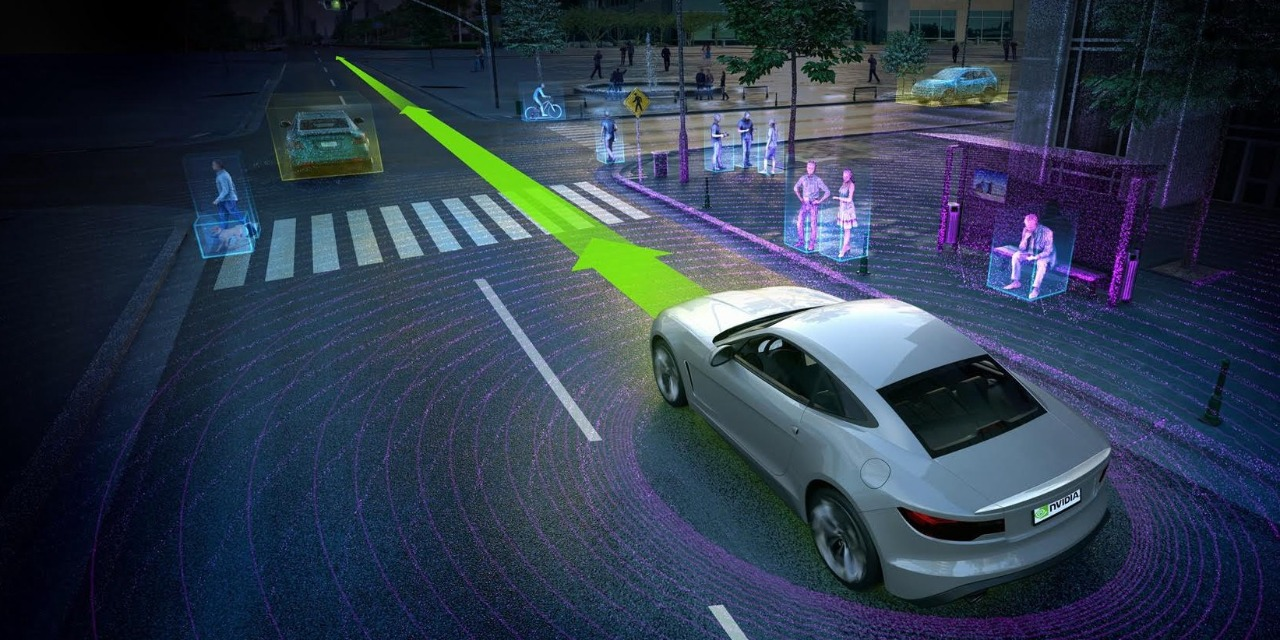

In [ ]:
from IPython.display import Image
Image(filename='car1.jpeg', height=300, width=600)

# 1. INTRODUCTION:

## A. OPEN CV:

OpenCV (Open Source Computer Vision Library) is an open source computer vision and machine learning software library. OpenCV was built to provide a common infrastructure for computer vision applications and to accelerate the use of machine perception in the commercial products.

OpenCV is a cross-platform library using which we can develop real-time computer vision applications. It mainly focuses on image processing, video capture and analysis including features like face detection and object detection.

OpenCV-Python is a library of Python bindings designed to solve computer vision problems. ... OpenCV-Python makes use of Numpy, which is a highly optimized library for numerical operations with a MATLAB-style syntax. All the OpenCV array structures are converted to and from Numpy arrays.

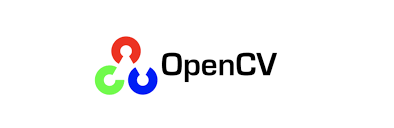

In [ ]:
from IPython.display import Image
Image(filename='intro.png', height=300, width=600)

## B. HAAR CASCADES:

Haar Cascade is a machine learning object detection algorithm used to identify objects in an image or video.

Haar Cascade is a machine learning-based approach where a lot of positive and negative images are used to train the classifier. Positive images – These images contain the images which we want our classifier to identify. Negative Images – Images of everything else, which do not contain the object we want to detect.

A Haar-like feature considers adjacent rectangular regions at a specific location in a detection window, sums up the pixel intensities in each region and calculates the difference between these sums. This difference is then used to categorize subsections of an image.

1. Positive images – These images contain the images which we want our classifier to identify.
2. Negative Images – Images of everything else, which do not contain the object we want to detect.

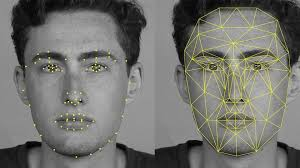

In [ ]:
from IPython.display import Image
Image(filename='hcs.jpg', height=300, width=600)

# 2. PROBLEM STATEMENT:

In this pandemic due to lack of personnel and lawlessness / unemployment , there has been a steep rise in crimes. Design a program using Live Video footage which can be used by general public to re-implement their home security using technology that is available at our fingertips.

# 3. OVERVIEW OF PROJECT:

In our project we have made use of Open CV and implemented it to real life problems such as security and detection of people / vehicles.
Detection would aid in prevention of unauthorized entering / tresspassing of people / vehicles into private property.
The main features and objectives of our project are as follows :
1. Home security
2. Motion detection
3. Car detction
4. Face and Eye detection
5. Gun detection

# 4. BUILDING A CASCADE:

## STEP 1: Download a Dataset

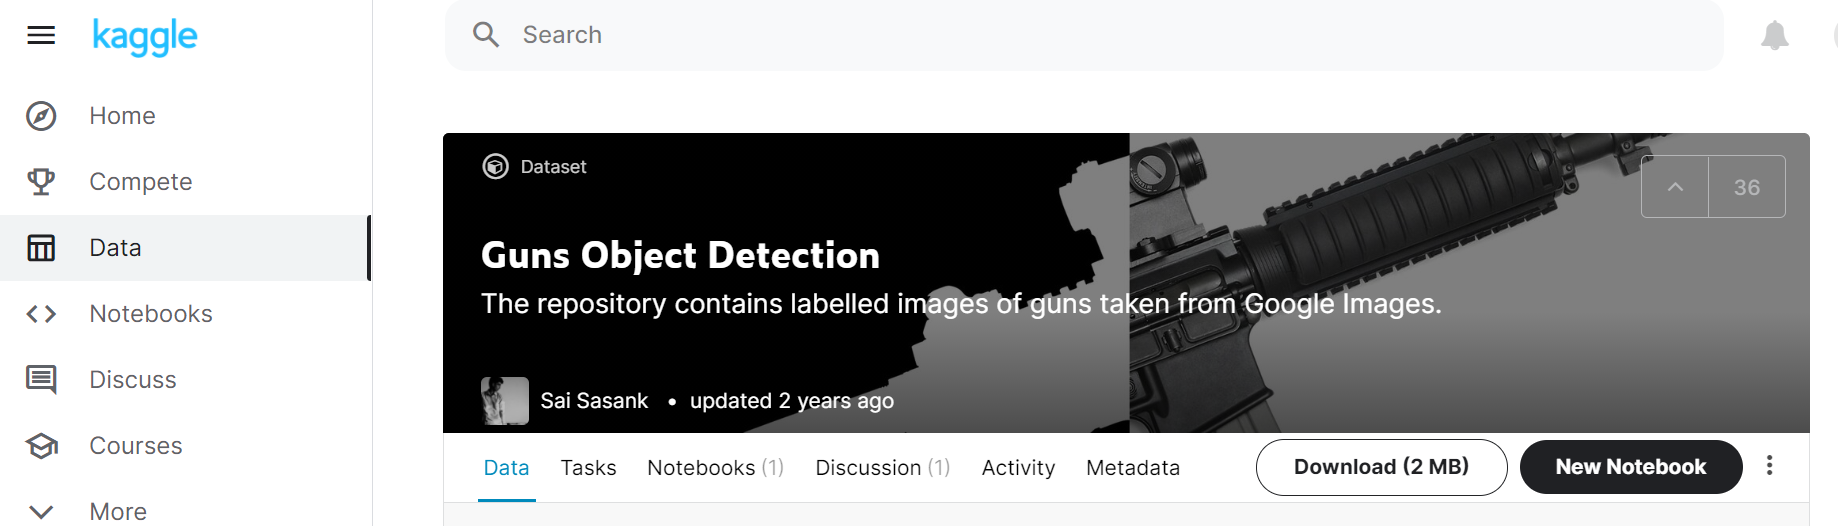

In [ ]:
from IPython.display import Image
Image(filename='cas1.PNG', height=300, width=600)

## STEP 2: Extract Dataset

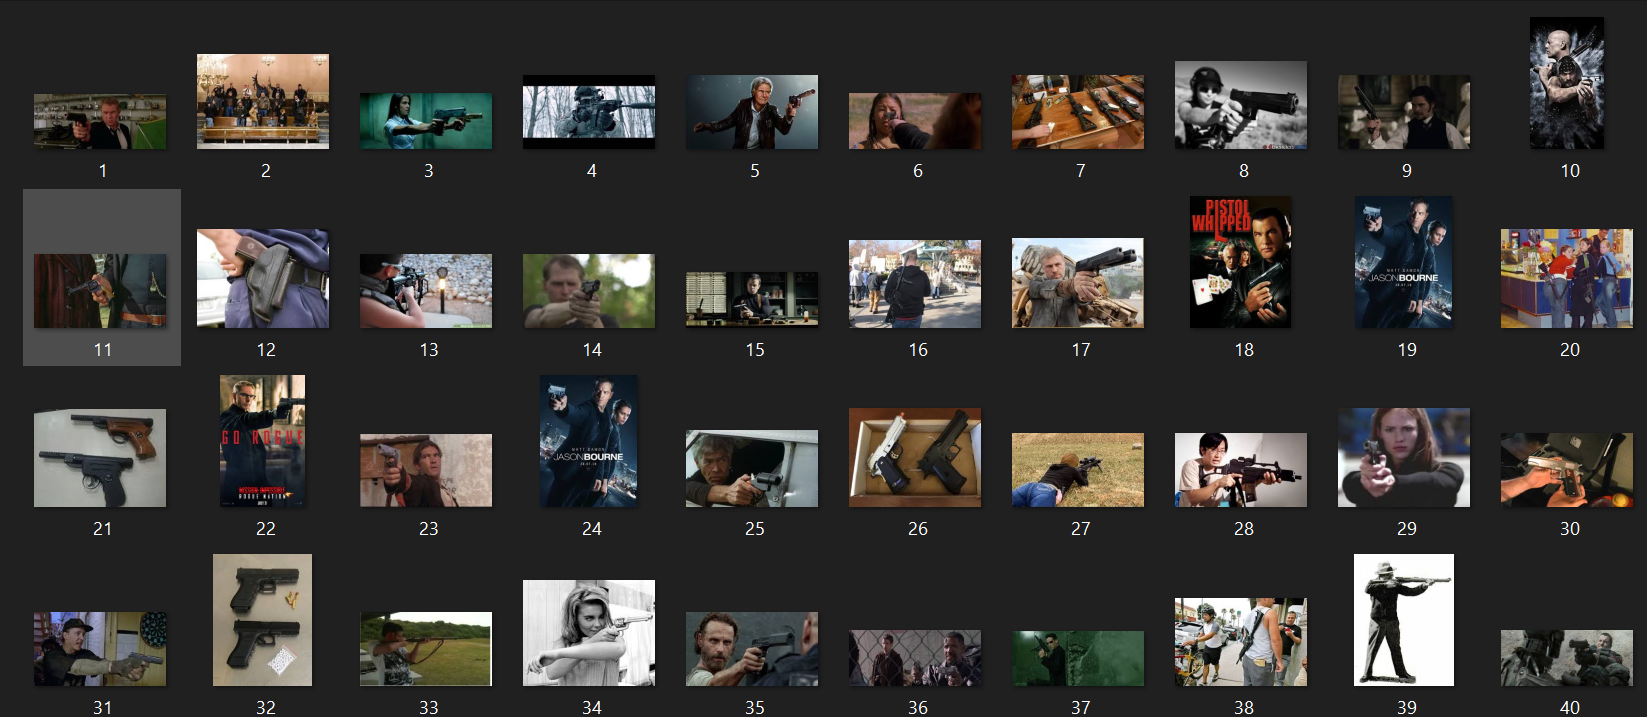

In [ ]:
from IPython.display import Image
Image(filename='cas2.PNG', height=300, width=600)

## STEP 3: Build XML file giving positive and negative images

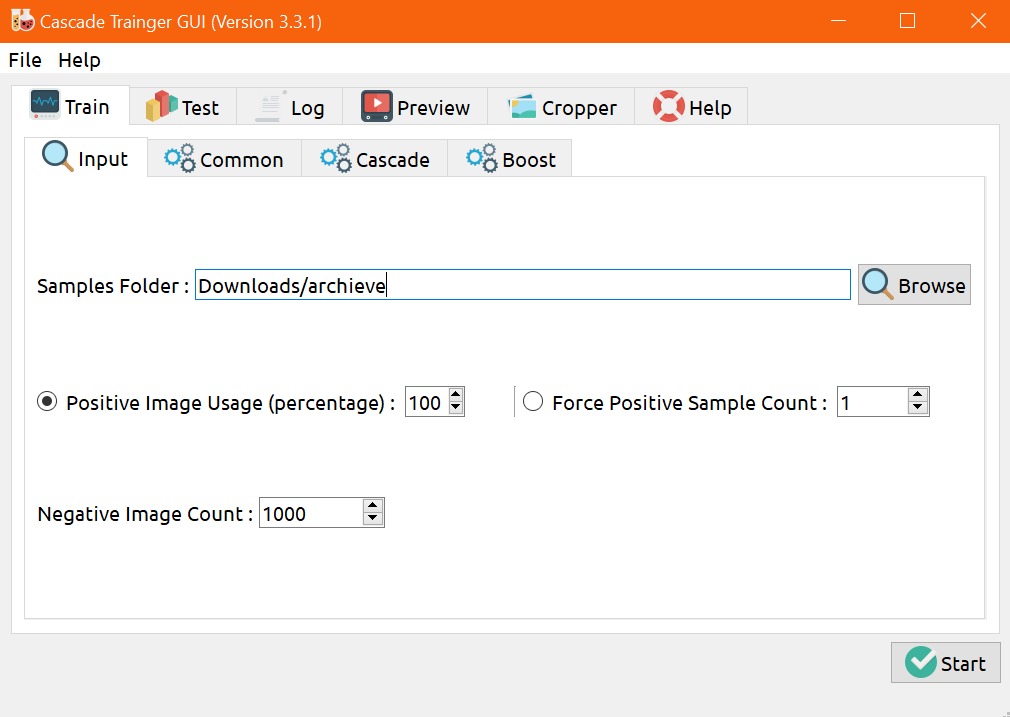

In [ ]:
from IPython.display import Image
Image(filename='cas3.PNG', height=300, width=600)

## Step 4: Use the XML file

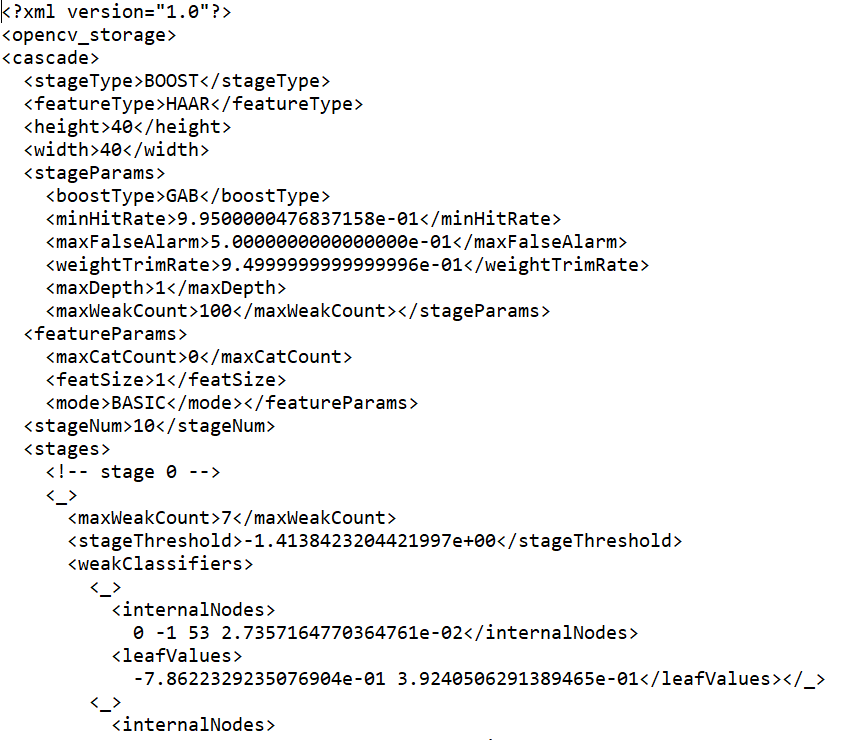

In [ ]:
from IPython.display import Image
Image(filename='cas4.PNG', height=500, width=600)

...

# 5. SOURCE CODE:

## A. IMPORTING NECESSARY LIBRARIES:

In [ ]:
import cv2
import numpy as np
import imutils

## B. IMPORTING LIVE CAMERA VIDEO

In [ ]:
#capture video in wecam and store frames in cap variable
cap=cv2.VideoCapture(0)

In real life application instead of using footage from webcam we can connect cctv cameras to local device and use respective device numbers to capture video.

In this project we have implemented our source code for home security using live webcam for trial purposes.

## C. IMPORTING NECESSARY HAAR CASCADES:

In [ ]:
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("haarcascade_eye_tree_eyeglasses.xml")
car_cascade = cv2.CascadeClassifier("cars.xml")
gun_cascade = cv2.CascadeClassifier('guns.xml')

1. FACE CASCADE - Detects faces in images / videos.
2. EYE CASCADE - Detects eyes in images / videos.
3. CAR CASCADE - Detects cars in images / videos.
4. GUN CASCADE - Detects guns in image / videos.

## D. MOTION DETECTION:

In the code below we have taken two simultaneous frames of Live Video. Any difference between the two frames indicates motion has occured and thus marks such zones of change using contours.

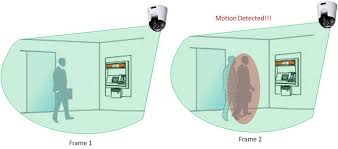

In [ ]:
from IPython.display import Image
Image(filename='md3.jpg', height=300, width=600)

### I. Reading Two Frames:

In [ ]:
ret, frame1 = cap.read()
ret, frame2 = cap.read()

### II. Loop over the frames to check for differences after performing basic image processing of respective frames:

In [ ]:
while cap.isOpened():
    #cv2.absdiff() is a method used to compare two images/frames
    diff = cv2.absdiff(frame1, frame2)
    #convert the difference calculated to grayscale in order to apply threshold on it
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    #Gaussian blur a widely used effect in graphics software, typically to reduce image noise and reduce detail.
    # Applying a Gaussian blur has the effect of reducing the image's high-frequency components
    # it allows us to provide different weight kernel in x and y directions
    #here kernel is set as (5,5) which is the value pixels are compared to
    blur= cv2.GaussianBlur(gray, (5,5), 0)
    #apply binary threshold on grayscale difference
    # here all pixels of intensity less than 20 will become black and those with more than 20 will become white
    _, th = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    #dilate threshold image to fill in all the holes
    #With binary images, dilation connects areas that are separated by spaces smaller than the structuring element
    #iterations is the number of times we want to perform dilation of our image
    dil= cv2.dilate(th, None, iterations=3)
    #find the contours in this thresholded image
    #RETR_TREE is the contour mode which is a hierarchy type ,such that contours present inside other contours have higher heirarchy
    #CHAIN_APPROX_NONE is a contour approximation method
    contours, _ = cv2.findContours(dil, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    #draw rectangles around any found contour
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)

        if cv2.contourArea(contour) < 700:
            continue
        cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
    #display video
    cv2.imshow("feed", frame1)
    #update frame to next frame
    frame1 = frame2
    ret, frame2 = cap.read()
    if cv2.waitKey(40)==27:
        break


### III. Closing windows:

In [ ]:
cv2.destroyAllWindows()

## E. FACE AND EYE DETECTOR:

In the code below we take frames from Live Video using Loop and we detect Face and Eyes using respective haar cascades. This can be used in the front / back door of the Home Security system to detect people entering the house.

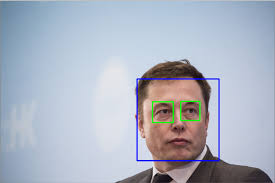

In [ ]:
from IPython.display import Image
Image(filename='fne.jpg', height=300, width=600)

In [ ]:
while cap.isOpened():
    #reading frames of video
    _, img = cap.read()
    #converting frames to grayscale
    gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #detecting faces using cascade
    faces = face_cascade.detectMultiScale(gr, 1.1, 4)
    
    #looping over detected faces to mark them in video
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)
        roi_gray = gr[y:y+h, x:x+w]
        roi_color = img[y:y + h, x:x + w]
        #detecting eyes using cascade
        eyes = eye_cascade.detectMultiScale(roi_gray)
        #looping over detected eyes to mark them in respective detected faces
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 1)
        cv2.imshow("img", img)
        if cv2.waitKey(1)==27:
            break
cap.release()
cv2.destroyAllWindows()

## F. CAR DETECTOR:

In the code below we take frames from Live Video using Loop and we detect cars haar cascades. This can be used in the driveway / garage / parking lot of the Home Security system to detect cars entering the property.

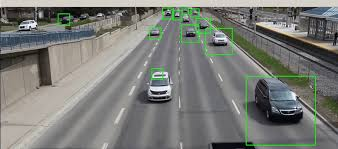

In [ ]:
from IPython.display import Image
Image(filename='cd.jpg', height=300, width=600)

In [ ]:
while cap.isOpened():
     # reads frames from a video
     ret, frames = cap.read()
     # convert to gray scale of each frames
     gray = cv2.cvtColor(frames, cv2.COLOR_BGR2GRAY)
     # Detects cars of different sizes in the input image
     cars = car_cascade.detectMultiScale(gray, 1.1, 1)
     # To draw a rectangle in each cars
     for (x,y,w,h) in cars:
         cv2.rectangle(frames,(x,y),(x+w,y+h),(0,0,255),2)
     font = cv2.FONT_HERSHEY_DUPLEX
     cv2.putText(frames,'Car', (x+6,y-6), font, 0.5, (0, 0, 255), 1)
     # Display frames in a window
     cv2.imshow('cars', frames)
     # Wait for Enter key to stop
     if cv2.waitKey(33) == 13:
         break
cap.release()
cv2.destroyAllWindows()

# G. GUN DETECTOR:

Guns being a harmful weapon makes it a must for them to be detected by a home security system for safety purposes.

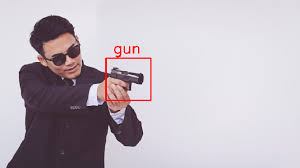

In [ ]:
from IPython.display import Image
Image(filename='gd.jpg', height=300, width=600)

In [ ]:
#Set default values
firstFrame = None
gun_exist = False

while True:
    #Read Frames
    ret, frame = cap.read()
    #Resize and Grayscale frames
    frame = imutils.resize(frame, width=500)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #Detect Guns in Frames
    gun = gun_cascade.detectMultiScale(gray,1.3, 5, minSize=(100, 100))

    if len(gun) > 0:
        gun_exist = True
    #Mark Guns Detected using Contours
    for (x, y, w, h) in gun:
        frame = cv2.rectangle(frame,
                              (x, y),
                              (x + w, y + h),
                              (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(gun, 'Gun Detected', (x + 6, y - 6), font, 0.5, (0, 0, 255), 1)

    if firstFrame is None:
        firstFrame = gray
        continue
    #Display Live Feed
    cv2.imshow("Security Feed", frame)
    key = cv2.waitKey(1) & 0xFF

    if key == ord('q'):
        break

if gun_exist:
    print("guns detected")
else:
    print("guns NOT detected")

cap.release()
cv2.destroyAllWindows()


# 6. LIVE OUTPUTS:

# A. MOTION DETECTOR:

BEFORE MOTION:

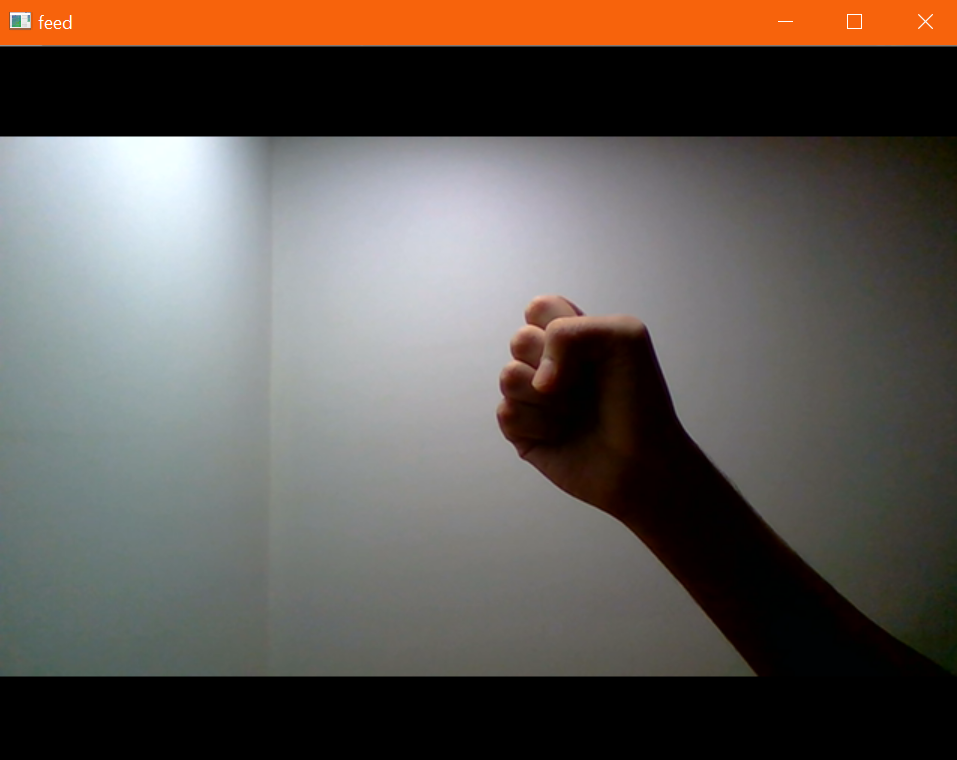

In [ ]:
from IPython.display import Image
Image(filename='MD1.PNG', height=200, width=400)

AFTER MOTION:

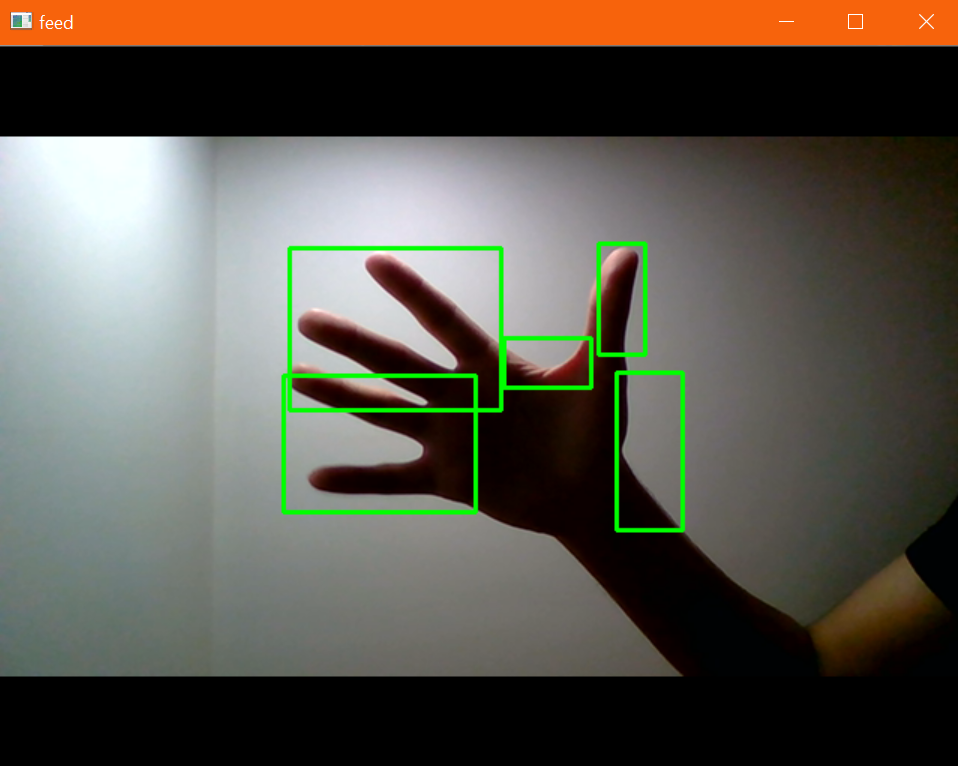

In [ ]:
from IPython.display import Image
Image(filename='MD2.PNG', height=200, width=400)

# B. FACE AND EYE DETECTOR:

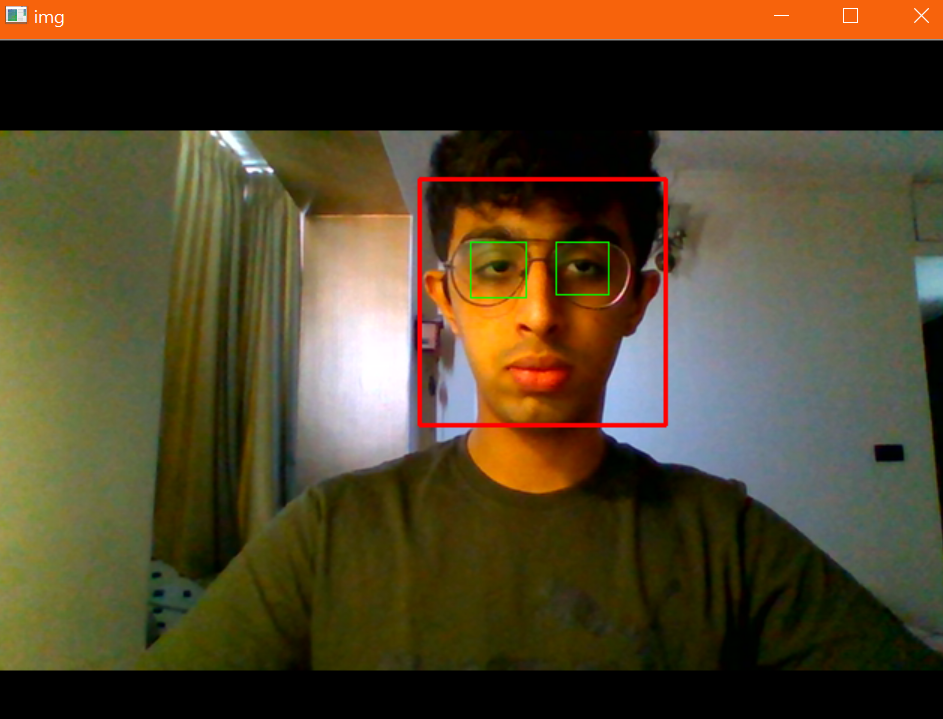

In [ ]:
from IPython.display import Image
Image(filename='fne1.PNG', height=200, width=200)

# C. CAR DETECTOR:

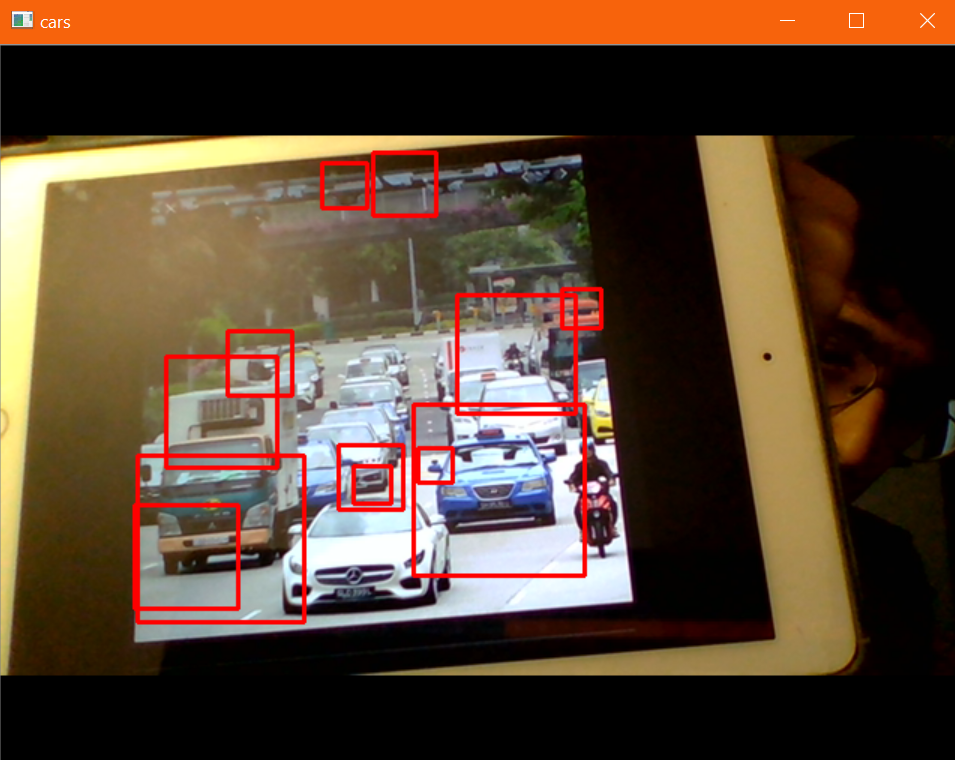

In [ ]:
from IPython.display import Image
Image(filename='car2.PNG', height=300, width=400)

## D. GUN DETECTOR:

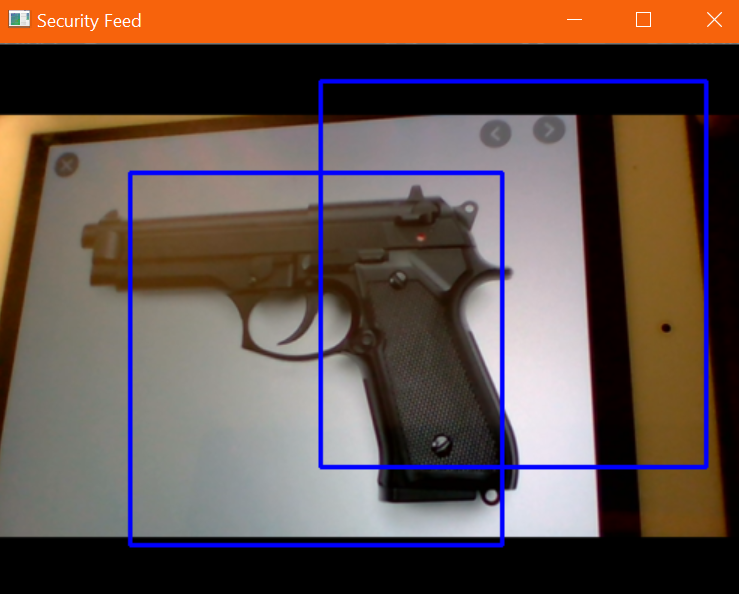

In [ ]:
from IPython.display import Image
Image(filename='gun1.PNG', height=200, width=200)

# 7. CONCLUSION:

In this project, we successfully detected 
1. Motion
2. Faces and Eyes
3. Cars
4. Guns

Using these detection programs we successfully created multiple elements of a Home security system on Live Video.